<a href="https://colab.research.google.com/github/saimohan19/UNP-assignments/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the dataset
Housing dataset contains the information of the properties sold in the city of "Nashville" over a sapn of 40 years. It contains all the necessary information like the area of the property, amount it was sold for, number of rooms that the property has etc. Our aim is to find some interesting insights from the data.

### Loading data
1. Import the "housing" data using appropriate functions.


### Cleaning data
1. Replace the missing values with appropriate approximations
2. Rename the columns to better suited names
3. Extract the month and year from the sale date.
4. Extract the pin number from the property address


### EDA
Use appropriate plots and functions to answer the following questions.

1. How has the price of properties changed over the years
2. Does a specific month or span of months have the highest property prices?
3. For what purpose were the properties generally purchased?
4. What is the average age of the properties?
5. Have the age of houses affected the price?
6. Have the number of rooms in the house affected the price?
7. Does the size of the property (no. of acres) have any influence in its price?
8. Are houses located in specific pin numbers expensive over the others?
9. How have house prices changed in the 21st centuary as supposed to 20th centuary. 

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

LOADING DATA

In [ ]:
data = pd.read_excel('Housing.xlsx')
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


**CLEANING DATA**

In [ ]:
data.isnull().sum()

UniqueID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

1. Replace the missing values with appropriate approximations

In [ ]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56473,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56474,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56475,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


In [ ]:
data.dropna(inplace=True)
data=data.reset_index(drop=True)

**2. Rename the columns to better suited names**

In [ ]:
data.columns

Index(['UniqueID ', 'LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice',
       'Acre', 'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt',
       'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [ ]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)

**3. Extract the month and year from the sale date.**

In [ ]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56443,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
56444,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
56445,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16
56446,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,9,7


**4. Extract the pin number from the property address**

In [ ]:
data['Pin'] = data['PropertyAddress'].str.slice(0, 4)
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
0,2045,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9,1808
1,16918,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10,1832
2,54582,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26,1864
3,43070,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29,1853
4,22714,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10,1829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56443,30469,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27,1435
56444,27707,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2,1423
56445,52709,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16,1804
56446,54042,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,9,7,1709


EDA

1. How has the price of properties changed over the years


In [ ]:

sales_grouped_data = data.groupby('Year')['TotalValue'].mean()


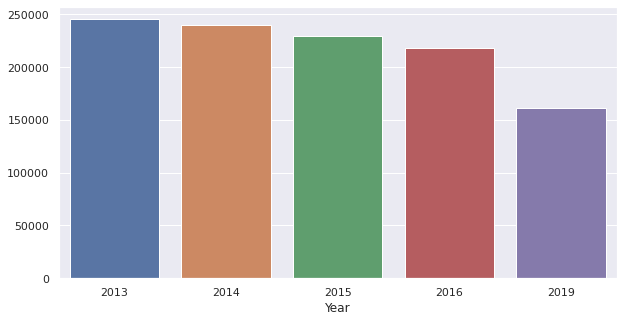

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=sales_grouped_data.index, y =sales_grouped_data.values)


2. Does a specific month or span of months have the highest property prices?
 

In [ ]:
month_grouped_data = data.groupby('Month')['TotalValue'].mean()
month_grouped_data

Month
1     230271.966277
2     229443.987791
3     225636.415592
4     233302.875766
5     234779.778462
6     242604.991433
7     234613.772727
8     232716.948531
9     228412.883323
10    228221.168478
11    231420.693613
12    229828.784849
Name: TotalValue, dtype: float64

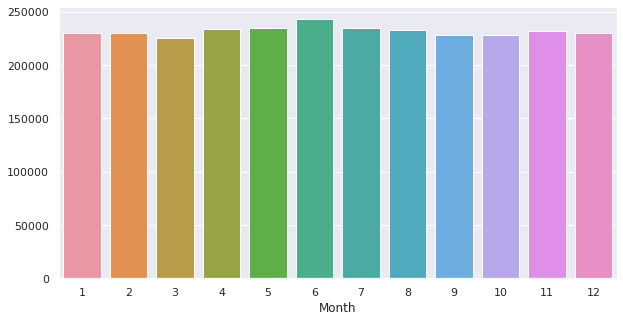

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=month_grouped_data.index,y=month_grouped_data.values)

3. For what purpose were the properties generally purchased?


In [ ]:
land_grouped_data=data.groupby('LandUse')['TotalValue'].count()
land_grouped_data

LandUse
APARTMENT: LOW RISE (BUILT SINCE 1960)            2
CHURCH                                           34
CLUB/UNION HALL/LODGE                             1
CONDO                                           247
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CONVENIENCE MARKET WITHOUT GAS                    1
DAY CARE CENTER                                   2
DORMITORY/BOARDING HOUSE                         19
DUPLEX                                         1373
FOREST                                           10
GREENBELT                                        10
GREENBELT/RES_x000D_\nGRRENBELT/RES               3
LIGHT MANUFACTURING                               1
METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK        1
MOBILE HOME                                      20
MORTUARY/CEMETERY                                 1
NIGHTCLUB/LOUNGE                                  1
NON-PROFIT CHARITABLE SERVICE                     2
OFFICE BLDG (ONE OR TWO STORIES)                  2
ONE 

4. What is the average age of the properties?


In [ ]:
data["age"]=(2022-data['YearBuilt'])
data["age"].mean()

58.26003614476386

5. Have the age of houses affected the price?


In [ ]:
dyp=data.groupby("age")["TotalValue"].mean()
dyp

age
5.0      823438.461538
6.0      509066.500000
7.0      499540.594059
8.0      424651.330798
9.0      427001.683502
             ...      
132.0    528200.000000
142.0    101800.000000
152.0    369650.000000
190.0    632200.000000
223.0    778900.000000
Name: TotalValue, Length: 127, dtype: float64

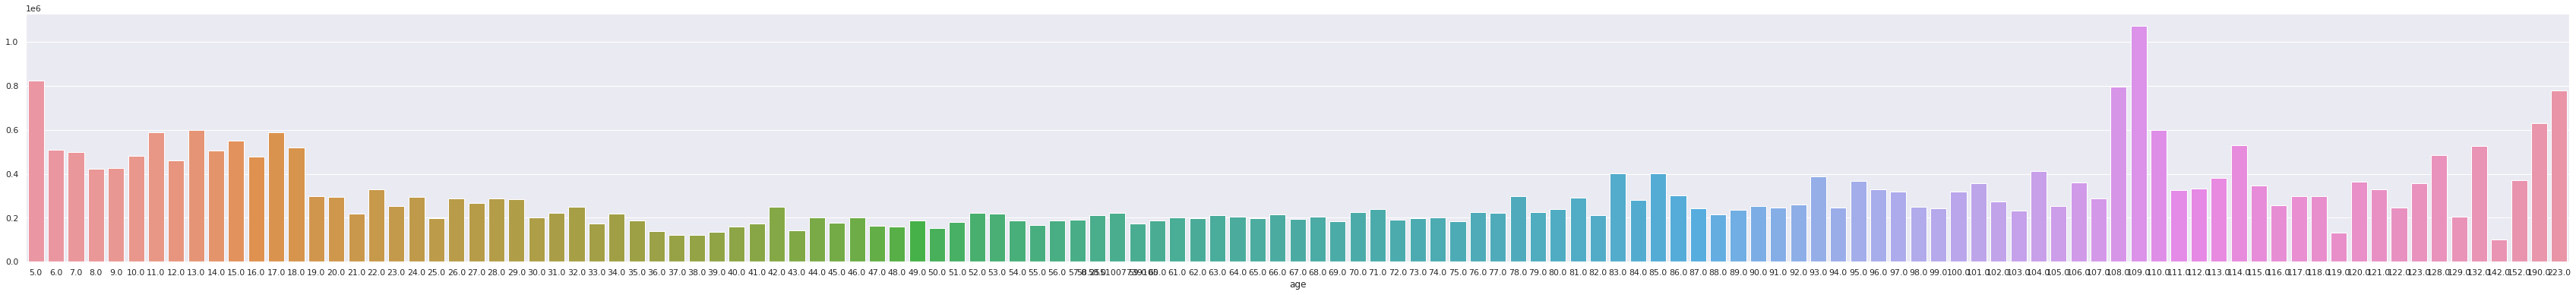

In [ ]:
sns.set(rc={'figure.figsize':(60,6)})
sns.barplot(x=dyp.index,y=dyp.values)

6. Have the number of rooms in the house affected the price?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


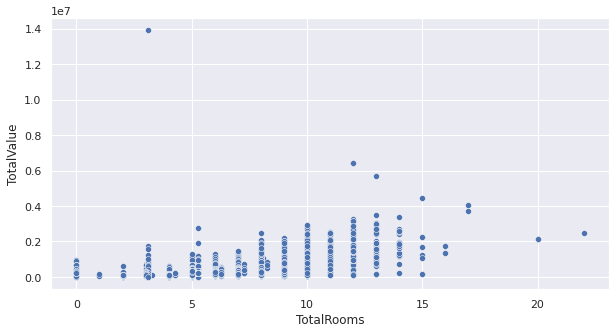

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data['TotalRooms'],data["TotalValue"])

In [ ]:
data['TotalRooms'] = data['Bedrooms'] + data['FullBathroom'] + data['HalfBathroom']
data['TotalRooms']

0        6.000000
1        8.000000
2        7.000000
3        6.000000
4        7.000000
           ...   
56443    5.259848
56444    5.259848
56445    5.259848
56446    5.259848
56447    5.259848
Name: TotalRooms, Length: 56448, dtype: float64

**7. Does the size of the property (no. of acres) have any influence in its price?**


In [ ]:
property_grouped_data=data.groupby('Acre')['TotalValue'].mean()
property_grouped_data

Acre
0.01      4.500000e+02
0.02      1.083333e+03
0.03      9.333333e+02
0.04      4.390000e+04
0.05      5.682727e+04
              ...     
47.50     1.494950e+05
51.34     6.435000e+05
62.96     9.444000e+05
68.79     5.832000e+04
160.06    1.921700e+06
Name: TotalValue, Length: 520, dtype: float64

In [ ]:
np.corrcoef(property_grouped_data.index,property_grouped_data.values)

array([[1.        , 0.16965822],
       [0.16965822, 1.        ]])

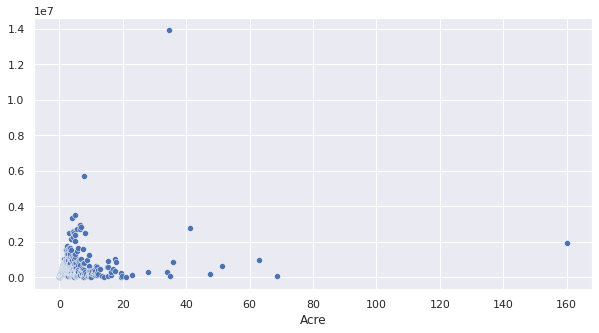

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x=property_grouped_data.index, y=property_grouped_data.values)

8. Are houses located in specific pin numbers expensive over the others?


9. How have house prices changed in the 21st centuary as supposed to 20th centuary.